載入需求套件  
keras.utils.np_utils應用於numpy的延伸工具  
預設backend為tensorflow

In [161]:
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense


np.random.seed(10)
%matplotlib inline

確認keras版本  
[官方中文文檔](https://keras.io/zh/)

In [4]:
keras.__version__

'2.1.6'

此資料集為手寫辨識，若目錄底下沒有資料會重新下載，需要多點時間  
下載之後檔案置於user\.keras\datasets

In [5]:
#  keras自帶資料集
from keras.datasets import mnist
mnist_data = mnist.load_data()

載入資料集後的第一件事是觀察你的資料集，舉凡訓練集、測試集樣本數，以及資料維度  
我們可以發現，資料集是二值化之後的照片，所以維度為(28,28)

In [6]:
#  觀察資料集
len(mnist_data)

2

In [7]:
#  index[0]為訓練資料集，index[1]為測試驗證資料集
#  做資料賦值
X_train_original, y_train_original = mnist_data[0]
X_test_original, y_test_original = mnist_data[1]

In [8]:
print('train example:', X_train_original.shape[0])
print('train_data_shape:', X_train_original.shape)
print('train_label_shape:', y_train_original.shape)
print('test_example:', X_test_original.shape[0])
print('test_data_shape:', X_test_original.shape)
print('test_label_shape:', y_test_original.shape)

train example: 60000
train_data_shape: (60000, 28, 28)
train_label_shape: (60000,)
test_example: 10000
test_data_shape: (10000, 28, 28)
test_label_shape: (10000,)


嚐試利用plt.imshow來顯示資料集照片

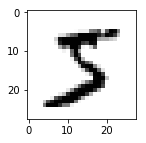

In [9]:
plt.figure(figsize=(2,2))
#  cmap=binary代表以灰階表示
plt.imshow(X_train_original[0], cmap='binary')
plt.show()

也可以定義一個函數來做多圖片檢閱

In [28]:
type(y_test_original[1])

numpy.uint8

In [258]:
import math

def plt_image(images, labels, predict_labels=[], idx_start=0, idx_batch_size=10):
    """
    images:來源照片(x)
    labels：來源照片類別(y)
    predict_labels:預測照片類別
    idx_start:起始索引
        預設為0
    idx_batch_size:每次讀取量
        預設為10
    
    當每次讀取批量>20的時候會以20取值
    """
    #  判斷索引值是否超過10，若超過10則idx_end重新賦值
    if idx_batch_size > 20:
        idx_batch_size = 20   
    
    rows = int(math.ceil(idx_batch_size / 5))
    #  設置圖表尺寸
    plt.figure(figsize=(8,4))
    for i in range(idx_batch_size): 
        ax = plt.subplot(rows,5,i+1)
        #  取消x、y軸的刻度
        plt.xticks(())        
        plt.yticks(())
        #  設置x軸的label為
        ax.set_xlabel('True labels:' + str(labels[idx_start]) + ',idx:' + str(idx_start))
        #  如果predict_labls不是空值，那就帶入資料
        if len(predict_labels)>0:            
            ax.set_title('Predict labels:' + str(predict_labels[idx_start]))
        ax.imshow(images[idx_start], cmap='binary')
        #  換下一筆
        idx_start += 1        
         
    #  確保資料呈現正常    
    plt.tight_layout()    
    plt.show()        

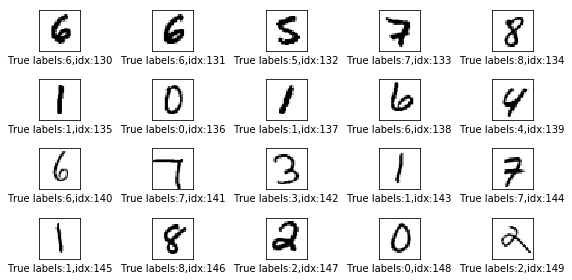

In [246]:
#  圖形檢閱資料集
plt_image(X_test_original, y_test_original,idx_start=130, idx_batch_size=25)

深度神經網路中，DNN的輸入維度是(n, m)，n為特徵，m為資料集，目前我們的資料集為(m, pixel_x, pixel_y)，也就是(60000, 28, 28)，我們必需將照片pixel向量化(或稱flatten)，變成28\*28=784，意指特徵n=784，m=60000。

In [138]:
#  透過reshape將資料調整為(m, n)再轉置為(n, m)
#  參數-1所指為剩下的，即28*28=784
X_train_original.reshape(X_train_original.shape[0], -1).T.shape

(784, 60000)

In [139]:
X_train_flatten = X_train_original.reshape(X_train_original.shape[0], -1).T
X_test_flatten = X_test_original.reshape(X_test_original.shape[0], -1).T

資料的處理通常都會做標準化來收縮資料分佈，在照片上最常見的處理方式就是除255

In [140]:
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

label的部份，我們有10個類別(0-9)，這需要利用one-hot encoding來調整。  
0 = [1,0,0,0,0,0,0,0,0,0]  
1 = [0,1,0,0,0,0,0,0,0,0]  
2 = [0,0,1,0,0,0,0,0,0,0]  
3 = [0,0,0,1,0,0,0,0,0,0]  
4 = [0,0,0,0,1,0,0,0,0,0]   
5 = [0,0,0,0,0,1,0,0,0,0]   
6 = [0,0,0,0,0,0,1,0,0,0]  
7 = [0,0,0,0,0,0,0,1,0,0]  
8 = [0,0,0,0,0,0,0,0,1,0]  
9 = [0,0,0,0,0,0,0,0,0,1]  
keras可以快速的幫我們完成這個變更，我們所import的np_utils.to_categorical可以完成one-hot encoding。

In [128]:
y_train = np_utils.to_categorical(y_train_original, num_classes=10)
y_test =  np_utils.to_categorical(y_test_original, num_classes=10)

在調整之後記得確認資料維度是否正確，並且檢查label是否轉置正常

In [143]:
print('feature numbers:', X_train.shape[0])
print('train example:', X_train.shape[1])
print('train_data_shape:', X_train.shape)
print('train_label_shape:', y_train.shape)
print('test_example:', X_test.shape[1])
print('test_data_shape:', X_test.shape)
print('test_label_shape:', y_test.shape)
print('y_test:',y_test[1])
print('y_test_original:', y_test_original[1])

feature numbers: 784
train example: 60000
train_data_shape: (784, 60000)
train_label_shape: (60000, 10)
test_example: 10000
test_data_shape: (784, 10000)
test_label_shape: (10000, 10)
y_test: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
y_test_original: 2


目前為止，我們的資料預處理已經完成，特徵數(n)=784，訓練樣本數=60000，測試樣本數=10000，預測類別=10(0-9)，接下來要開始建置模型，keras創立之初就是希望從業人員可以專注在模型的建立，而不是程式架構的建置，也因此keras減少了很多在tensorflow上的很多工作。  
DNN為標準神經網路，輸入層不算，最後一層為輸出層，中間為隱藏層，普遍來說，除非最後的輸出類別為二類才會特別使用sigmoid，否則隱藏層activation function多為relu(建議)或tanh，最後輸出多類別再使用softmax。  
理論來說，愈深的神經網路效果會更好，因為有了更複雜的函數連結，但是相對的也可能產生梯度消失或梯度爆炸的問題，這部份需要特別注意。

神經網路實作中首注意為維度問題，當然在利用framework來訓練模型的時候，很多部份都由framework來處理了，連最困擾的back propagation也會由framework計算完畢，行業人員只需要觀注在『模型架構』上即可。但對相關觀念建議還是需要有，避免在實作中遇到維度問題而無法排除。  

此例我們預計使用5層神經網路，即為輸入層、隱藏層\*4、輸出層，這邊注意到，L層神經網路中所指並不包含輸入層，故L=5為隱藏層\*4+輸出層。  
* forward propagation  
$W^{[l]}=(n^{[l]}, n^{[l-1]})$   
$b^{[l]}=(n^{[l]}, 1)$  
$Z^{[l]}=W^{[l]}A^{[l-1]}$  
$A^{[l]}=g(Z^{[l]})$  

下面說明著整個神經網路在各層的維度  
* 輸入層
    * dimension:(784, 60000)
    * n:784
    * m:60000
* 隱藏層\_1
    * hidden_unit:392
    * weights:(392, 784)
    * bias:(392, 1)
    * output:(392, 60000)
* 隱藏層\_2
    * hidden_unit:196
    * weights:(196, 392)
    * bias:(196, 1)
    * output:(196, 60000)
* 隱藏層\_3
    * hidden_unit:98
    * weights:(98, 196)
    * bias:(98, 1)
    * output:(98, 60000)
* 隱藏層\_4
    * hidden_unit:49
    * weights:(49, 98)
    * bias:(49, 1)
    * output:(49, 60000)
* 輸出層
    * weights:(10, 49)
    * bias:(10, 1)
    * ouput:(10, 60000)



keras在建置模型的時候有兩種方式，以順序架構(`keras.models.Sequential`)或是以函式設置(`keras.models.Model`)，前者可快速建模初步了解模型效能與資料關聯，後者重用性高，這部份沒有優劣，再各自以需求採用即可。

## Sequential
[sequential](https://keras.io/zh/getting-started/sequential-model-guide/)是順序性的堆疊起來的神經網路，可初始實作Sequential的時候即設置好模型，也可以利用`model.add`來加入各層。  
[Dense](https://keras.io/zh/layers/core/)是普通全連接層，裡面眾多參數都請參考官方文件說明較為清楚。

我們先設置輸入層，輸入層所設置的`input_shape`等同於`input_dim`，只是設置的方式稍有不同，同時會在輸入層中設置輸出數量(units)，即隱藏層(l=1)的的hidden_unit數量。

In [351]:
#  實作
model = Sequential()
#  l=1
#  注意到我們的shape設置為(784,)，在tensorflow會設置為None
model.add(Dense(units=392  #  輸出數量
                , activation='relu'  #  啟動函數
                , kernel_initializer='he_normal'  #  權重初始化方式
                , kernel_regularizer='l2'  #  正規化方式
                , input_shape=(784,)))  #  輸入維度，僅l=1層需要設置

設置其它隱藏層(l=2~4)

In [178]:
model.add(Dense(units=196  #  輸出數量，0-9
                , activation='relu'  #  啟動函數
                , kernel_initializer='he_normal'  #  權重初始化方式
                , kernel_regularizer='l2'))  #  正規化方式
model.add(Dense(units=98  #  輸出數量，0-9
                , activation='relu'  #  啟動函數
                , kernel_initializer='he_normal'  #  權重初始化方式
                , kernel_regularizer='l2'))  #  正規化方式
model.add(Dense(units=49  #  輸出數量，0-9
                , activation='relu'  #  啟動函數
                , kernel_initializer='he_normal'  #  權重初始化方式
                , kernel_regularizer='l2'))  #  正規化方式

設置輸出層(l=5)，輸出層跟其它隱藏層的不同在於啟動函數我們不再使用rele，而是softmax。

In [179]:
model.add(Dense(units=10  #  輸出數量，0-9
                , activation='softmax'  #  啟動函數以softmax執行
                , kernel_initializer='he_normal'  #  權重初始化方式
                , kernel_regularizer='l2'))  #  正規化方式                

在keras中，可以透過`model.summary()`來快速觀察目前的神經網路架構以及訓練參數數量，也可以看到OutputShape的部份有一個None，這是因為模型目前沒有資料集數量的原因。  
第一層的權重參數=784\*392(weights)+392(bias)=307720，其它層以相同方式計算。參數數量可以讓我們用來判斷需求的計算資源，如在CNN中如以VGG16架構來執行的話，總參數上億，需求計算資源非常可觀。

In [180]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_7 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_8 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_9 (Dense)              (None, 49)                4851      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                500       
Total params: 409,405
Trainable params: 409,405
Non-trainable params: 0
_________________________________________________________________


如上面所提，透過framework來執行的話我們只需要考量forward propagation，backpropagation的部份會依我們設置的參數由framework來做相對應的執行。  
所以，接下來我們以`model.compile`來設置模型的訓練參數：
* 設置[最佳化](https://keras.io/zh/optimizers/)：SGD、RMSprop、Dropout、Adam...等  
* 設置[損失函數](https://keras.io/zh/losses/)：mean_squared_error、categorical_crossentropy...等
* 設置[評估方式](https://keras.io/zh/metrics/)

In [181]:
model.compile(optimizer='adam'
              , loss='categorical_crossentropy'
              , metrics=['accuracy'])

最後，我們準備[訓練模型](https://keras.io/zh/models/sequential/)，主要設置的參數會有每次訓練批量以及迭代次數，如有需求可以設置驗證比例，這會從訓練集從取相對應的比例做驗證資料集，訓練之後會回傳`History`物件，裡面會保存著相關資料，所以我們設置一個history來接訓練之後的資料。  
註：在keras中，訓練集的維度為(m, n)，故此例為(60000, 784)，所以在參數上做了矩陣轉置。

In [182]:
history = model.fit(X_train.T, y_train, batch_size=256, epochs=20, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 137us/step - loss: 3.7891 - acc: 0.8437 - val_loss: 1.4712 - val_acc: 0.9105
Epoch 2/20
48000/48000 [==============================] - 6s 122us/step - loss: 1.2479 - acc: 0.9069 - val_loss: 1.0738 - val_acc: 0.9243
Epoch 3/20
48000/48000 [==============================] - 6s 116us/step - loss: 1.0383 - acc: 0.9186 - val_loss: 0.9734 - val_acc: 0.9241
Epoch 4/20
48000/48000 [==============================] - 6s 118us/step - loss: 0.9572 - acc: 0.9214 - val_loss: 0.9032 - val_acc: 0.9318
Epoch 5/20
48000/48000 [==============================] - 6s 117us/step - loss: 0.9190 - acc: 0.9222 - val_loss: 0.8824 - val_acc: 0.9301
Epoch 6/20
48000/48000 [==============================] - 6s 117us/step - loss: 0.8876 - acc: 0.9262 - val_loss: 0.8582 - val_acc: 0.9325
Epoch 7/20
48000/48000 [==============================] - 6s 130us/step - loss: 0.8696 - acc: 0.9273 - val_loss: 0.8372 - 

訓練結果可以看的出在訓練資料集與驗證資料集中還是存在著可避免方差，這部份可以透過模型調整來優化，但範例只是演示，故不會在調校上多著墨，在實作模型的時候我們可以嚐試著快速的執行一次，以了解目前的模型狀況，才有辦法依著定義的方向來調整，是資料集不足，或是特徵不足，諸如此類問題，甚至手動記錄錯誤資料，以此了解調整方向

不管如何，在快速完成一次訓練之後，我們可以透過history將模型資訊可視化，以了解loss、acc比較。  
先了解history內有資料結構，依據官方文件說明，`history.history`內保存著資料集的訓練記錄，格式為dict。

In [183]:
history.history

{'acc': [0.8437083333333333,
  0.9069375,
  0.9185833333333333,
  0.9214166666666667,
  0.9221666666666667,
  0.9261875,
  0.9273333333333333,
  0.9266041666666667,
  0.9284375,
  0.9302916666666666,
  0.9299583333333333,
  0.9315208333333334,
  0.9316458333333333,
  0.9329583333333333,
  0.9336666666666666,
  0.9348958333333334,
  0.9342708333333334,
  0.9351458333333333,
  0.9342083333333333,
  0.9359583333333333],
 'loss': [3.7891460405985513,
  1.2479315923055012,
  1.0382914028167725,
  0.9572180608113606,
  0.9189907754262289,
  0.8876275328000387,
  0.8696463591257731,
  0.8596362533569336,
  0.8459326992034912,
  0.835565132300059,
  0.8333686955769857,
  0.8237910758654277,
  0.820629576365153,
  0.8191762925783793,
  0.8134132835070292,
  0.8093970467249553,
  0.8079525841077169,
  0.8065310808817545,
  0.8051052541732788,
  0.800931831518809],
 'val_acc': [0.9104999996821086,
  0.9242500001589458,
  0.9240833330154419,
  0.9317500003178915,
  0.9300833333333334,
  0.93249999

了解資料結構之後，我們就可以設置一個function來做可視化

In [226]:
def model_history_plot(history, epoch):
    """
    history:訓練記錄，為keras.History.history
    epoch:迭代次數，為keras.History.epoch
    
    首先判斷物件長度是否為4，如果是那代表有啟用驗證資料集，若為2，就代表只有訓練資料集。
    """
    #  用以判斷是否有驗證資料集，如果dict長度為4則賦值為True
    val = False
    
    if len(history)==4:
        val = True
        val_acc = history['val_acc']
        val_loss = history['val_loss']
        
    acc = history['acc']
    loss = history['loss']
       
    #  設置圖表
    plt.figure(figsize=(16,9))
    
    #  準確度_acc
    plt.subplot(121)
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.xlim(min(epoch), max(epoch)+1)
    plt.plot(epoch, acc, label='train_acc')
    
    if val:
        plt.plot(epoch, val_acc, label='val_cc')
    plt.legend(loc='best')
    
    #  訓練成本_loss
    plt.subplot(122)    
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.xlim(min(epoch), max(epoch)+1)
    plt.plot(epoch, loss, label='train_loss')
    
    if val:
        plt.plot(epoch, val_loss, label='val_loss')            
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()
    

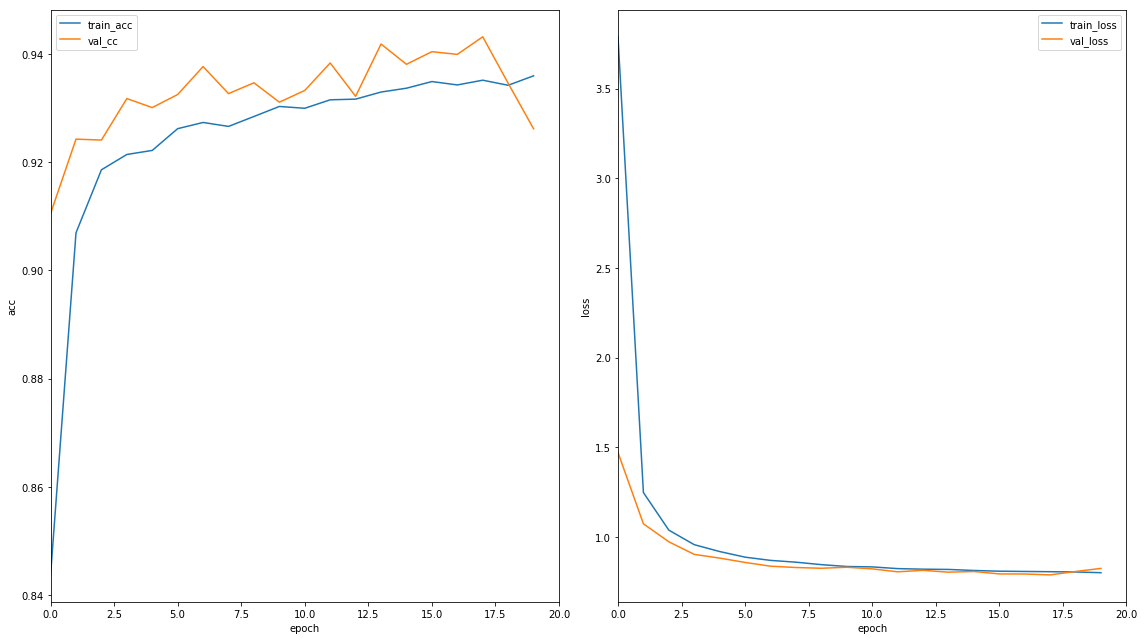

In [227]:
model_history_plot(history.history, history.epoch)

從上面圖表可以看到，以準確度來說，驗證資料集與訓練資料集存在著方差問題，我們可以試著一個一個參數調校，如l2的正規化參數，或最佳化adam的學習效率，但對於$\beta$的部份是不建議調整的。

現在訓練資料集與驗證資料集都已完成，我們預計確認對於測試資料集的泛化效果，可以利用`model.evaluate`來完成。  
`model.evaluate`的回傳是依據你所設置的評估模式，如果自己不確定的話可以利用`model.metrics_name`與`model.metric`來檢閱

In [228]:
scores = model.evaluate(X_test.T, y_test)

10000/10000 [==============================] - 2s 233us/step


In [233]:
model.metrics_names

['loss', 'acc']

In [239]:
print('train_accuracy:', history.history['acc'][max(history.epoch)])
if len(history.history)==4:
    print('train_accuracy:', history.history['val_acc'][max(history.epoch)])
print('test_accuracy:', scores[1])

train_accuracy: 0.9359583333333333
train_accuracy: 0.9261666663487752
test_accuracy: 0.9234


確認完三個資料集的loss與accuracy之後，我們可以來執行predict，以此了解模型預測的錯誤都在那邊，這部份可以利用keras的`model.predict_class`完成。   
完成之後就可以再利用稍早所建立的函數(plt_image)來產生圖表檢識。

In [250]:
train_predict = model.predict_classes(X_train.T, verbose=1)
test_predict = model.predict_classes(X_test.T, verbose=1)

10000/10000 [==============================] - 1s 99us/step


In [251]:
test_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

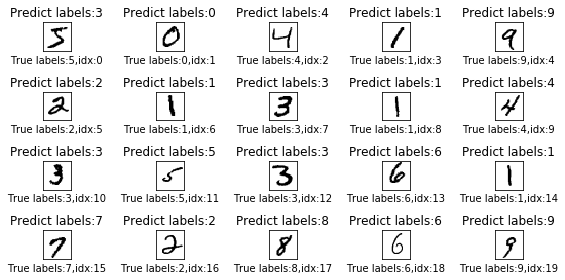

In [259]:
plt_image(X_train_original, y_train_original, predict_labels=train_predict, idx_start=0, idx_batch_size=20)

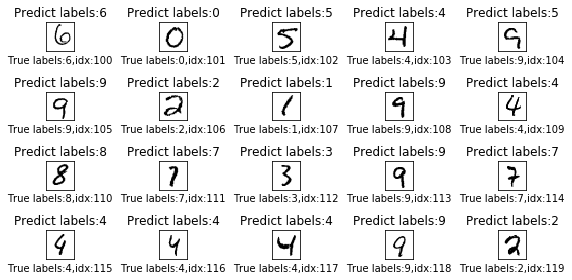

In [260]:
plt_image(X_test_original, y_test_original, predict_labels=test_predict, idx_start=100, idx_batch_size=20)

設置遮罩來取得錯誤資料的索引，再利用遮罩來單純的檢閱錯誤資料

In [263]:
mask_train = y_train_original != train_predict
mask_test = y_test_original != test_predict

In [268]:
print('train_error_count:', y_train_original[mask_train].shape[0])
print('test_error_count:', y_test_original[mask_test].shape[0])

train_error_count: 4506
test_error_count: 766


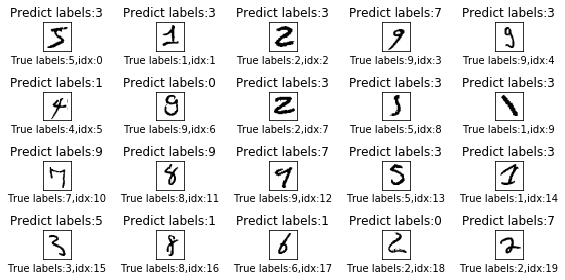

In [267]:
plt_image(X_train_original[mask_train], y_train_original[mask_train], predict_labels=train_predict[mask_train], idx_start=0, idx_batch_size=20)

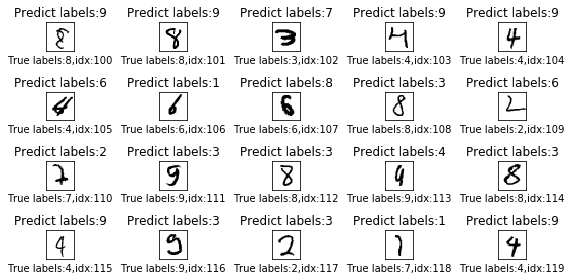

In [269]:
plt_image(X_test_original[mask_test], y_test_original[mask_test], predict_labels=test_predict[mask_test], idx_start=100, idx_batch_size=20)

看起來有些資料誤判是其來有自，如果判斷成功反而奇怪，但是不少是應該對而沒對的，這部份就需要透過模型調校來優化。

在最後，我們預計利用pandas來呈現交叉比對的資料結果，這可以透過`pandas.crosstab`來完成  
這邊提供兩個範例，分別為使用`crosstab`與`pivot_table`

因為資料結構的關係，所以使用`crosstab`較為方便，一句就可以達成。

In [316]:
pd.crosstab(y_test_original, test_predict, rownames=['test_label'], colnames=['predict_label'])

predict_label,0,1,2,3,4,5,6,7,8,9
test_label,,,,,,,,,,
0,966,0,1,3,0,5,0,1,4,0
1,0,1120,1,5,0,1,2,2,4,0
2,9,13,916,45,2,0,6,35,5,1
3,0,0,5,986,0,3,0,11,3,2
4,1,14,4,0,847,0,11,6,5,94
5,11,1,1,80,1,766,6,0,11,15
6,20,4,4,0,7,13,896,2,12,0
7,2,13,9,11,1,0,0,975,0,17
8,5,8,3,83,5,19,5,5,822,19


如果要使用`pivot_table`的話，在下想到的方法是先合併向量，再提供為Dataframe的資料之後再做`pivot_table`  
可參考[個人git](https://github.com/shaoeChen/pandas_foundation/blob/e059a14fcdf85cd7e1031452eed983deb33d4535/pandas/Pandas%2BMultiIndex.ipynb)
1. margins:是否總計
2. aggfunc:使用的聚合函數，預設為np.means

In [320]:
#  將資料合併
hstack_test = np.hstack((y_test_original.reshape(y_test_original.shape[0],1), test_predict.reshape(test_predict.shape[0],1)))
hstack_test.shape

(10000, 2)

In [350]:
#  實作DataFrame
data = pd.DataFrame(hstack_test)
#  設置欄位名稱
data.columns=['y_test_original','test_predict']
#  檢查前五筆資料
data.head()

,y_test_original,test_predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [349]:
data.pivot_table(index='y_test_original', columns='test_predict', aggfunc=len, margins=True)

test_predict,0,1,2,3,4,5,6,7,8,9,All
y_test_original,,,,,,,,,,,
0,966.0,NaN,1.0,3.0,NaN,5.0,NaN,1.0,4.0,NaN,980.0
1,NaN,1120.0,1.0,5.0,NaN,1.0,2.0,2.0,4.0,NaN,1135.0
2,9.0,13.0,916.0,45.0,2.0,NaN,6.0,35.0,5.0,1.0,1032.0
3,NaN,NaN,5.0,986.0,NaN,3.0,NaN,11.0,3.0,2.0,1010.0
4,1.0,14.0,4.0,NaN,847.0,NaN,11.0,6.0,5.0,94.0,982.0
5,11.0,1.0,1.0,80.0,1.0,766.0,6.0,NaN,11.0,15.0,892.0
6,20.0,4.0,4.0,NaN,7.0,13.0,896.0,2.0,12.0,NaN,958.0
7,2.0,13.0,9.0,11.0,1.0,NaN,NaN,975.0,NaN,17.0,1028.0
8,5.0,8.0,3.0,83.0,5.0,19.0,5.0,5.0,822.0,19.0,974.0


## 總結
這只是資料分析的一個迭代，在快速的建立一個模型確認效能與資料集狀況之後，就要開始不斷的循環調控，以減少可避免誤差與方差，並接近人類水平。